# <b> Word Cloud - NLTK
   

## <b> Importing Libraries

In [1]:
from utils.headers import *
import utils.functions as func

## <b> Prepare Text

##### <b> Read and Organize in a File Reader

In [2]:
# Save the path file
folder = 'utils/raven.txt'
file = open(folder, 'r') 
poem = file.read()

##### <b> Split data into words

In [3]:
tokens = word_tokenize(poem)
print(tokens[0:10])

['Once', 'upon', 'a', 'midnight', 'dreary', ',', 'while', 'I', 'pondered', ',']


##### <b> Removing the stopwords

In [4]:
stop_words = set(stopwords.words('english')) # unique words
tokens = [w for w in tokens if not w in stop_words]
print(tokens[0:10])

['Once', 'upon', 'midnight', 'dreary', ',', 'I', 'pondered', ',', 'weak', 'weary']


##### <b> Removing the punctuation

In [5]:
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens[0:10])

['once', 'upon', 'midnight', 'dreary', 'i', 'pondered', 'weak', 'weary', 'over', 'many']


##### <b> Inspect frequency words from our Text

In [6]:
vocabulary = set(tokens) # unique values
print(len(vocabulary))
frequency = nltk.FreqDist(tokens)
frequency

374


FreqDist({'i': 32, 'chamber': 11, 'raven': 10, 'bird': 10, 'door': 9, 'and': 8, 'nothing': 7, 'still': 7, 'said': 7, 'thy': 7, ...})

## <b> Word Cloud

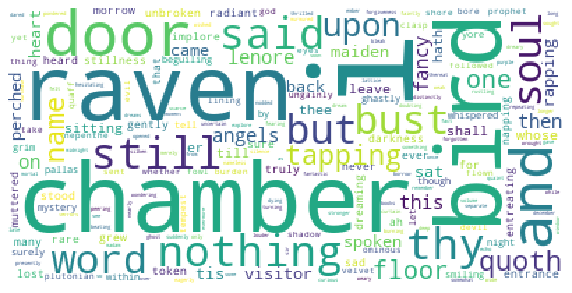

In [7]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## <b> Word2Vec

##### <b> Create our vocabulary

In [8]:
# convert lines to a single blob of text
vocab = '\n'.join(tokens)
# open file
file = open("utils/vocabulary.txt", 'w')
# write text
file.write(vocab)
# close file
file.close()

In [9]:
# Load corpus to Python
with codecs.open('utils/vocabulary.txt', encoding = 'utf8') as fp:
    corpus = fp.read()

In [10]:
corpus[:100]

'once\nupon\nmidnight\ndreary\ni\npondered\nweak\nweary\nover\nmany\nquaint\ncurious\nvolume\nforgotten\nwhile\ni\nno'

In [11]:
# Tokenization with NLTK 
sentences = [[w.lower() for w in word_tokenize(sentence, language = 'english')] for sentence in sent_tokenize(corpus, language = 'english')]

In [12]:
# Treinando o modelo
model = Word2Vec(sentences, size = 300, window = 5, min_count = 5, workers = 8)
model.init_sims(replace = True)

In [13]:
# Probabilityes of a word appers around niggle
model.most_similar('raven')

<ipython-input-13-59af2f77ec03>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('raven')


[('tapping', 0.08029213547706604),
 ('and', 0.07953709363937378),
 ('bird', 0.06832283735275269),
 ('i', 0.06609407067298889),
 ('door', 0.06551897525787354),
 ('upon', 0.05114384740591049),
 ('said', 0.05087219178676605),
 ('bust', 0.039120327681303024),
 ('name', 0.038483940064907074),
 ('nothing', 0.02061610110104084)]

In [14]:
model.save('model/word2vec.model')

In [15]:
# load to prevent processing again
model = Word2Vec.load("model/word2vec.model")

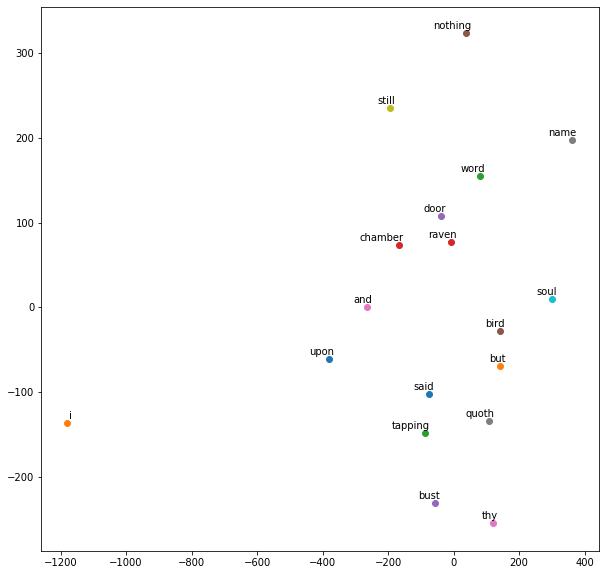

In [19]:
func.plot_tsne(model, perplexity=20, components=3, iterations=1000)